### Welcome to HyperBinding. We can help you slice your protein into fragments with desirable length and predicate their binding affinity to HLA-A-02. 

In [1]:
print('Please enter your protein sequence')
sequence = input()

Please enter your protein sequence
MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDLFLPFFSNVTWFHAIHVSGTNGTKRFDNPVLPFNDGVYFASTEKSNIIRGWIFGTTLDSKTQSLLIVNNATNVVIKVCEFQFCNDPFLGVYYHKNNKSWMESEFRVYSSANNCTFEYVSQPFLMDLEGKQGNFKNLREFVFKNIDGYFKIYSKHTPINLVRDLPQGFSALEPLVDLPIGINITRFQTLLALHRSYLTPGDSSSGWTAGAAAYYVGYLQPRTFLLKYNENGTITDAVDCALDPLSETKCTLKSFTVEKGIYQTSNFRVQPTESIVRFPNITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQTGKIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYLYRLFRKSNLKPFERDISTEIYQAGSTPCNGVEGFNCYFPLQSYGFQPTNGVGYQPYRVVVLSFELLHAPATVCGPKKSTNLVKNKCVNFNFNGLTGTGVLTESNKKFLPFQQFGRDIADTTDAVRDPQTLEILDITPCSFGGVSVITPGTNTSNQVAVLYQDVNCTEVPVAIHADQLTPTWRVYSTGSNVFQTRAGCLIGAEHVNNSYECDIPIGAGICASYQTQTNSPRRARSVASQSIIAYTMSLGAENSVAYSNNSIAIPTNFTISVTTEILPVSMTKTSVDCTMYICGDSTECSNLLLQYGSFCTQLNRALTGIAVEQDKNTQEVFAQVKQIYKTPPIKDFGGFNFSQILPDPSKPSKRSFIEDLLFNKVTLADAGFIKQYGDCLGDIAARDLICAQKFNGLTVLPPLLTDEMIAQYTSALLAGTITSGWTFGAGAALQIPFAMQMAYRFNGIGVTQNVLYENQKLIANQFNSAIGKIQDSLSSTASALGKLQDVVNQNAQALNTLVKQ

In [6]:
print('Please enter the length of your sliced fragments')
length = int(input())

Please enter the length of your sliced fragments
8


In [33]:
print('Please enter which class of binding you want to see:')
print('for very strong binder, kd<=30nM, please enter 0')
print('for strong binder, 50nM<kd<=500nM, please enter 1')
print('for medium binder, 500nM<kd<=10000nM, please enter 2')
print('for weak binder, 10000nM<kd<=20000nM, please enter 3')
print('for very weak binder, kd>20000nM, please enter 4')
index = int(input())

Please enter which class of binding you want to see:
for very strong binder, kd<=30nM, please enter 0
for strong binder, 50nM<kd<=500nM, please enter 1
for medium binder, 500nM<kd<=10000nM, please enter 2
for weak binder, 10000nM<kd<=20000nM, please enter 3
for very weak binder, kd>20000nM, please enter 4
0


In [15]:
import matplotlib.pyplot as plt
import numpy as np
import peptideCutter
import single_peptide_convert
import multiple_channel_matrix_generator
from keras.models import load_model

In [19]:
model = load_model('multi_class_CNN_model.h5')

In [16]:
cuts = peptideCutter.cutting(sequence,length)

In [17]:
sequences = []
for pp in cuts:
    sequences.append(single_peptide_convert.peptide_converter(pp))

In [20]:
predict = []
for pp in sequences:
    matrix = multiple_channel_matrix_generator.multiple_channel_generator(pp)
    matrix = matrix.reshape((1,12,21,3))
    pre = model.predict(matrix)[0].argmax()
    predict.append(pre)

In [23]:
label_list = np.zeros(5)
for label in predict:
    if label == 0:
        label_list[0] += 1
    elif label == 1:
        label_list[1] += 1
    elif label == 2:
        label_list[2] += 1
    elif label == 3:
        label_list[3] += 1
    else:
        label_list[4] += 1

In [26]:
labels = ['Very strong', 'Strong', 'Medium', 'Weak', 'Very weak']

Your protein sequence is:
MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDLFLPFFSNVTWFHAIHVSGTNGTKRFDNPVLPFNDGVYFASTEKSNIIRGWIFGTTLDSKTQSLLIVNNATNVVIKVCEFQFCNDPFLGVYYHKNNKSWMESEFRVYSSANNCTFEYVSQPFLMDLEGKQGNFKNLREFVFKNIDGYFKIYSKHTPINLVRDLPQGFSALEPLVDLPIGINITRFQTLLALHRSYLTPGDSSSGWTAGAAAYYVGYLQPRTFLLKYNENGTITDAVDCALDPLSETKCTLKSFTVEKGIYQTSNFRVQPTESIVRFPNITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQTGKIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYLYRLFRKSNLKPFERDISTEIYQAGSTPCNGVEGFNCYFPLQSYGFQPTNGVGYQPYRVVVLSFELLHAPATVCGPKKSTNLVKNKCVNFNFNGLTGTGVLTESNKKFLPFQQFGRDIADTTDAVRDPQTLEILDITPCSFGGVSVITPGTNTSNQVAVLYQDVNCTEVPVAIHADQLTPTWRVYSTGSNVFQTRAGCLIGAEHVNNSYECDIPIGAGICASYQTQTNSPRRARSVASQSIIAYTMSLGAENSVAYSNNSIAIPTNFTISVTTEILPVSMTKTSVDCTMYICGDSTECSNLLLQYGSFCTQLNRALTGIAVEQDKNTQEVFAQVKQIYKTPPIKDFGGFNFSQILPDPSKPSKRSFIEDLLFNKVTLADAGFIKQYGDCLGDIAARDLICAQKFNGLTVLPPLLTDEMIAQYTSALLAGTITSGWTFGAGAALQIPFAMQMAYRFNGIGVTQNVLYENQKLIANQFNSAIGKIQDSLSSTASALGKLQDVVNQNAQALNTLVKQLSSNFGAIS

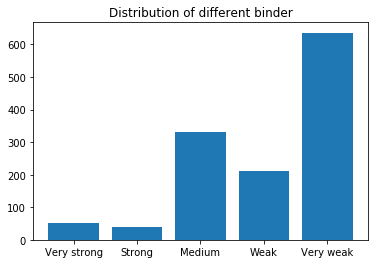

The fragments of Very strong binders are shown below
MFVFLVLL
FLVLLPLV
VLLPLVSS
DLFLPFFS
FLPFFSNV
WFHAIHVS
FQFCNDPF
FLGVYYHK
CTFEYVSQ
FLMDLEGK
NLREFVFK
GFSALEPL
TLLALHRS
YLTPGDSS
YLQPRTFL
FLLKYNEN
ALDPLSET
RVQPTESI
NLCPFGEV
YSVLYNSA
VLYNSASF
KLNDLCFT
RQIAPGQT
ELLHAPAT
ILDITPCS
CSFGGVSV
VLYQDVNC
CLIGAEHV
YTMSLGAE
MSLGAENS
LLQYGSFC
FSQILPDP
LLFNKVTL
TLADAGFI
GLTVLPPL
YTSALLAG
MQMAYRFN
KLQDVVNQ
RLDKVEAE
SLQTYVTQ
NLAATKMS
KMSECVLG
HLMSFPQS
FLHVTYVP
YVPAQEKN
YIKWPWYI
WLGFIAGL
FIAGLIAI
GLIAIVMV
IMLCCMTS
CMTSCCSC


In [34]:
print('Your protein sequence is:')
print(sequence)
print('Your protein will be sliced into',length,'-mers, total', len(cuts))
print('Below are your result summary:')


plt.bar(labels,label_list)
plt.title('Distribution of different binder')
plt.show()

print('The fragments of',labels[index],'binders are shown below')
for i in range(len(cuts)):
    if predict[i] == index:
        print(cuts[i])
    else:
        continue